In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Student_performance_data.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


## Предварительная обработка данных

#### Пропуски и дубли

Посмотрим на пропуски:

In [2]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

и на дубли:

In [3]:
df.duplicated().sum()

np.int64(0)

Ни пропусков, ни дублей нет.

#### Нормализация данных

In [4]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


Видим, что данные не нормализованы. Исправим это:

In [96]:
df = df.drop('StudentID', axis = 1) #этот столбец не пригодится при обучении

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(df)
df_std = pd.DataFrame(X_std, columns = df.columns)

In [98]:
df_std.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03
mean,8.406505e-16,-1.440691e-16,-7.129191e-17,4.455745e-17,1.173346e-16,8.911489e-18,-2.970496e-17,-1.336723e-17,4.232957e-17,-4.158695e-17,-4.010170e-17,-8.465915e-17,4.381482e-17,-1.782298e-17
std,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00
min,-1.307132e+00,-1.021981e+00,-8.533909e-01,-1.745885e+00,-1.728882e+00,-1.717694e+00,-6.568700e-01,-1.890357e+00,-7.884763e-01,-6.601320e-01,-4.951614e-01,-4.318656e-01,-2.083345e+00,-2.418592e+00
25%,-1.307132e+00,-1.021981e+00,-8.533909e-01,-7.460868e-01,-8.367399e-01,-8.908224e-01,-6.568700e-01,-9.995505e-01,-7.884763e-01,-6.601320e-01,-4.951614e-01,-4.318656e-01,-7.993565e-01,-7.973866e-01
50%,-4.171064e-01,9.784921e-01,-8.533909e-01,2.537113e-01,-1.178937e-02,5.417330e-02,-6.568700e-01,-1.087439e-01,-7.884763e-01,-6.601320e-01,-4.951614e-01,-4.318656e-01,-1.398263e-02,8.238193e-01
75%,4.729190e-01,9.784921e-01,1.091641e+00,2.537113e-01,8.203737e-01,8.810445e-01,1.522371e+00,7.820626e-01,1.268269e+00,1.514848e+00,-4.951614e-01,-4.318656e-01,7.825767e-01,8.238193e-01
max,1.362944e+00,9.784921e-01,2.064157e+00,2.253308e+00,1.805881e+00,1.707916e+00,1.522371e+00,1.672869e+00,1.268269e+00,1.514848e+00,2.019544e+00,2.315535e+00,2.288410e+00,8.238193e-01


Теперь mean ≈ 0, std ≈ 1

## EDA

#### Сбалансированность данных

In [99]:
mx_cat = df_std['GradeClass'].value_counts().idxmax()
mn_cat = df_std['GradeClass'].value_counts().idxmin()
1 - df_std['GradeClass'].value_counts()[mn_cat] / df_std['GradeClass'].value_counts()[mx_cat]

np.float64(0.911643270024773)

Получили, что разница между самым маленьким и большим классом составляет 90%. Это означает, что данные несбалансированны. Об этом важно будет помнить при обучении модели. 

#### Распределение категориальных переменных

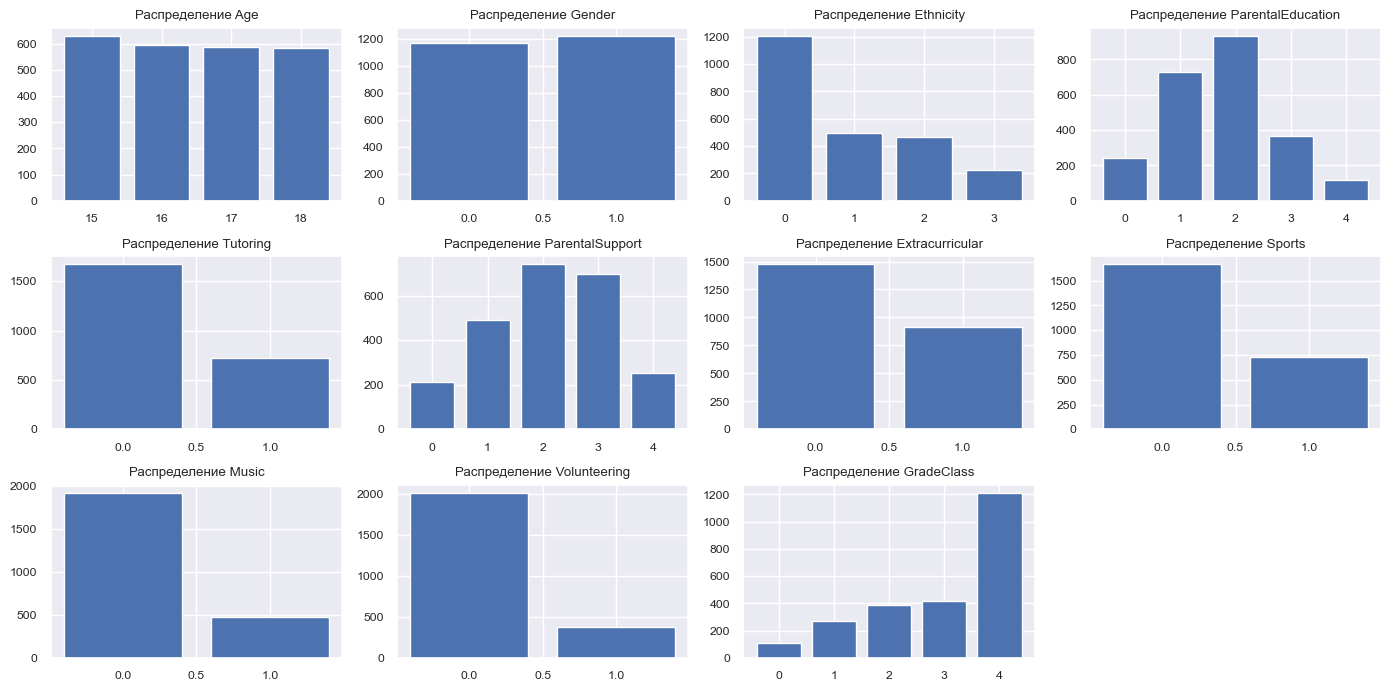

In [100]:
categorical = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']

plt.figure(figsize = (14, 7))

for i, feature in enumerate(categorical, 1):
    plt.subplot(3, 4, i)
    value_counts = df[feature].value_counts()
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f'Распределение {feature}')

plt.tight_layout()
plt.show()

Вспоминаем, что у нас GradeClass были несбалансированы и видим, что 4(это оценка F - неуд.) столько же сколько всех остальных оценок:

Text(0.5, 1.0, 'Кол-во людей с оценкой F в сравнении с \nкол-вом людей с другими оценками')

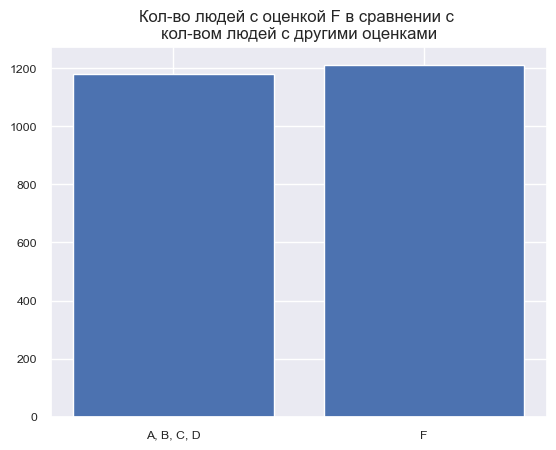

In [131]:
plt.bar(['A, B, C, D', 'F'], [len(df[df['GradeClass']!=4]), len(df[df['GradeClass']==4])])
plt.title(f'Кол-во людей с оценкой F в сравнении с \nкол-вом людей с другими оценками', size = 12)

А все не F оценки распределены уже не настолько неравномерно:

Text(0.5, 1.0, 'Кол-во людей с оценками A, B, C, D')

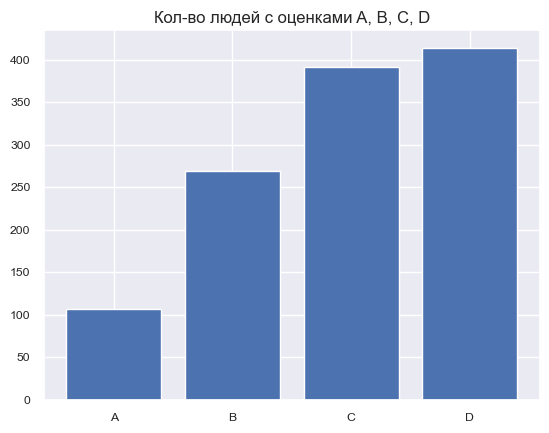

In [138]:
temp = df[df['GradeClass']!=4]
plt.bar(temp['GradeClass'].value_counts().index, temp['GradeClass'].value_counts().values)
plt.xticks(range(4), ['A', 'B', 'C', 'D'])
plt.title(f'Кол-во людей с оценками A, B, C, D', size = 12)

Поэтому мы решили сделать две задачи классификации: будем определять сдаст студент или не сдаст(то есть получит F). А если студент сдаст, то на какую оценку: A, B, C, D.

Посмотрим на другие распределения более подробно:

C:\Users\aleks\AppData\Local\Temp\ipykernel_11952\1036757271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="Ethnicity", y="GPA", palette="tab10")


Text(0.5, 1.0, 'boxplot-диаграммы для GPA по расам')

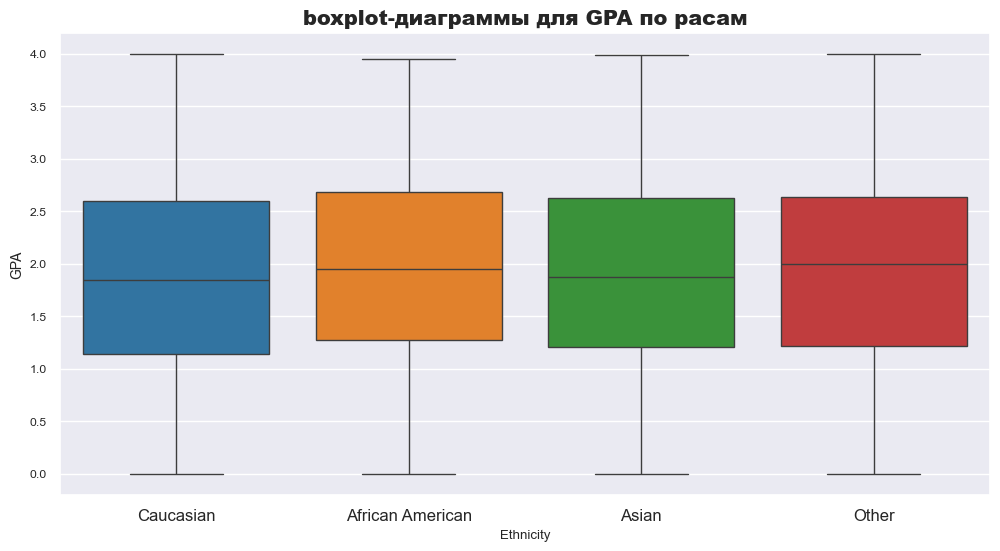

In [69]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=0.8)
sns.boxplot(df, x="Ethnicity", y="GPA", palette="tab10")
plt.ylabel("GPA", size=10)
plt.xticks(ticks=range(4), labels=['Caucasian', 'African American', 'Asian', 'Other'], size = 12)
plt.title("boxplot-диаграммы для GPA по расам", size=15, weight='heavy')

C:\Users\aleks\AppData\Local\Temp\ipykernel_11952\1413487819.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="Gender", y="GPA", palette="tab10")


Text(0.5, 1.0, 'boxplot-диаграммы для GPA по гендеру')

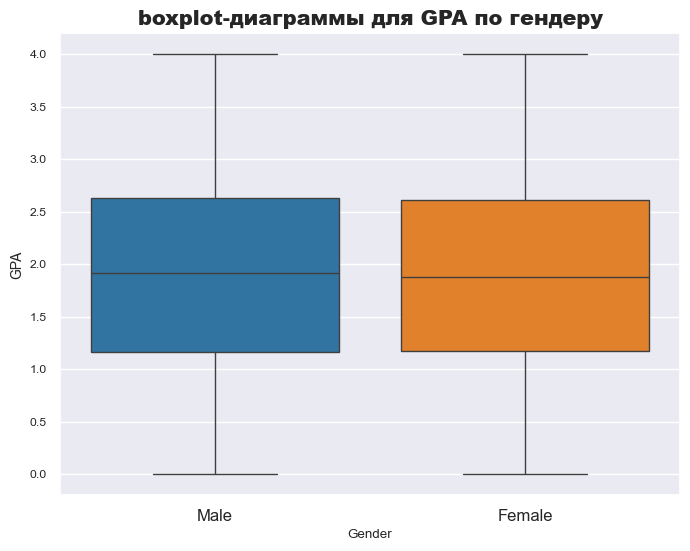

In [77]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=0.8)
sns.boxplot(df, x="Gender", y="GPA", palette="tab10")
plt.ylabel("GPA", size=10)
plt.xticks(ticks=range(2), labels=['Male', 'Female'], size = 12)
plt.title("boxplot-диаграммы для GPA по гендеру", size=15, weight='heavy')

C:\Users\aleks\AppData\Local\Temp\ipykernel_11952\3519312359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="ParentalEducation", y="GPA", palette="tab10")


Text(0.5, 1.0, 'boxplot-диаграммы для GPA по уровню образования родителей')

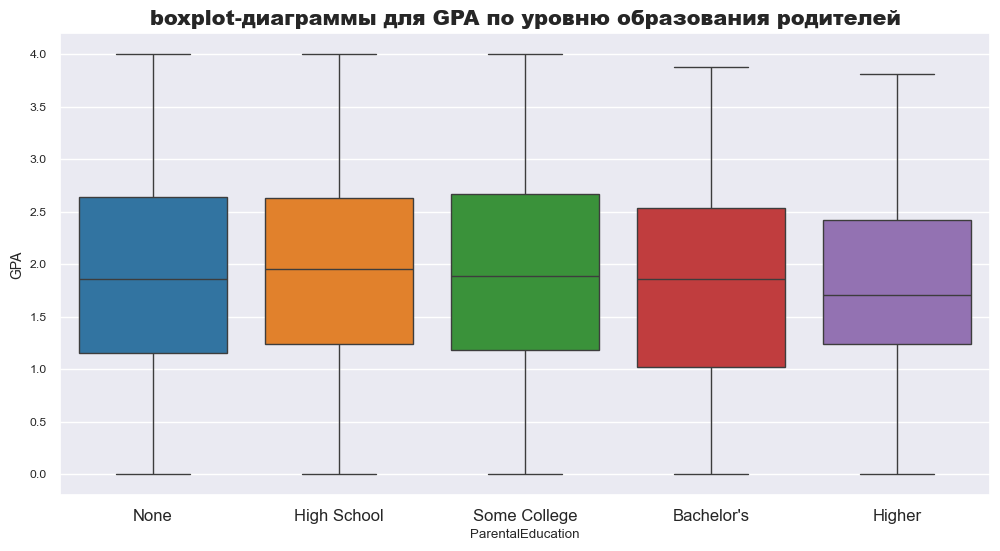

In [141]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=0.8)
sns.boxplot(df, x="ParentalEducation", y="GPA", palette="tab10")
plt.ylabel("GPA", size=10)
plt.xticks(ticks=range(5), labels=['None', 'High School', 'Some College', "Bachelor's", 'Higher'], size = 12)
plt.title("boxplot-диаграммы для GPA по уровню образования родителей", size=15, weight='heavy')

C:\Users\aleks\AppData\Local\Temp\ipykernel_11952\1626606375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="ParentalSupport", y="GPA", palette="tab10")


Text(0.5, 1.0, 'boxplot-диаграммы для GPA по уровню помощи родителей')

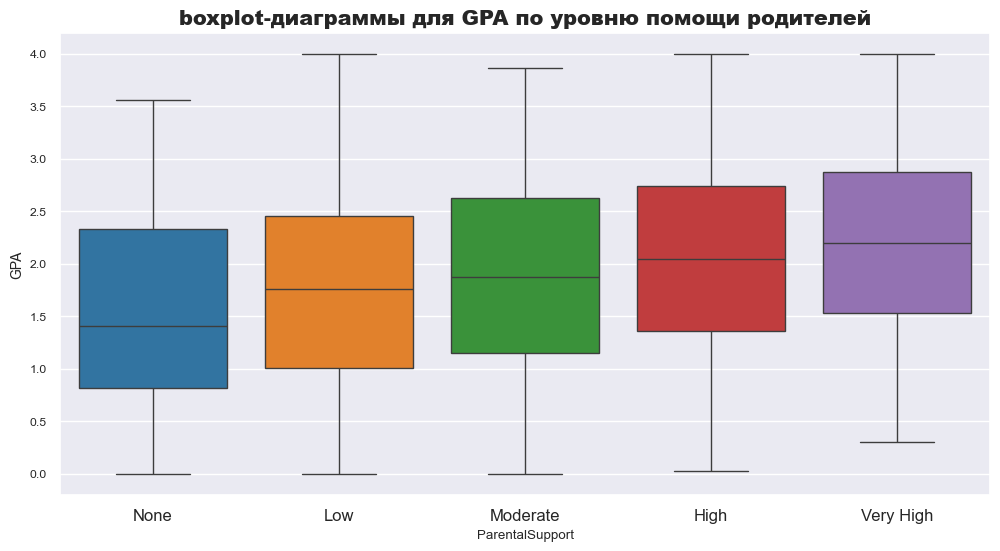

In [109]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=0.8)
sns.boxplot(df, x="ParentalSupport", y="GPA", palette="tab10")
plt.ylabel("GPA", size=10)
plt.xticks(ticks=range(5), labels=['None', 'Low', 'Moderate', "High", 'Very High'], size = 12)
plt.title("boxplot-диаграммы для GPA по уровню помощи родителей", size=15, weight='heavy')

Видим, что от гендера GPA вообще не зависит. В то время как от большей помощи родителей GPA в среднем увеличивается.

И посмотрим то же самое для Absences(пропуски уроков):

C:\Users\aleks\AppData\Local\Temp\ipykernel_11952\550150763.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="Ethnicity", y="Absences", palette="tab10")


Text(0.5, 1.0, 'boxplot-диаграммы для пропусков по расам')

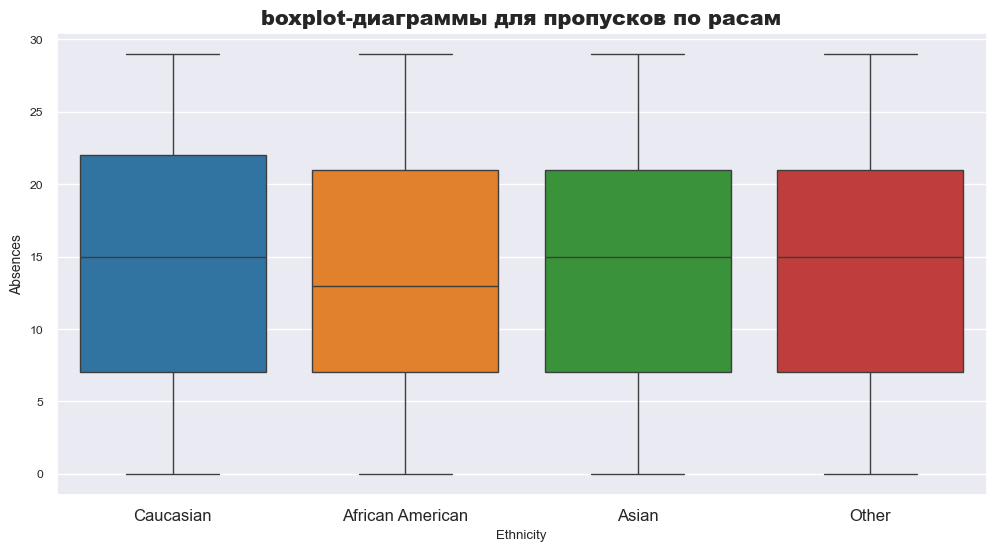

In [155]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=0.8)
sns.boxplot(df, x="Ethnicity", y="Absences", palette="tab10")
plt.ylabel("Absences", size=10)
plt.xticks(ticks=range(4), labels=['Caucasian', 'African American', 'Asian', 'Other'], size = 12)
plt.title("boxplot-диаграммы для пропусков по расам", size=15, weight='heavy')

C:\Users\aleks\AppData\Local\Temp\ipykernel_11952\2625133567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="Gender", y="Absences", palette="tab10")


Text(0.5, 1.0, 'boxplot-диаграммы для пропусков по гендеру')

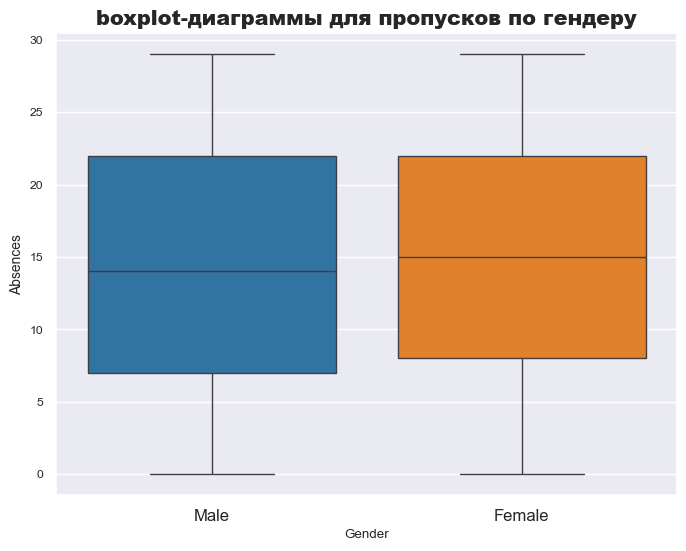

In [156]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=0.8)
sns.boxplot(df, x="Gender", y="Absences", palette="tab10")
plt.ylabel("Absences", size = 10)
plt.xticks(ticks=range(2), labels=['Male', 'Female'], size = 12)
plt.title("boxplot-диаграммы для пропусков по гендеру", size=15, weight='heavy')

C:\Users\aleks\AppData\Local\Temp\ipykernel_11952\1362602080.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="ParentalEducation", y="Absences", palette="tab10")


Text(0.5, 1.0, 'boxplot-диаграммы для пропусков по уровню образования родителей')

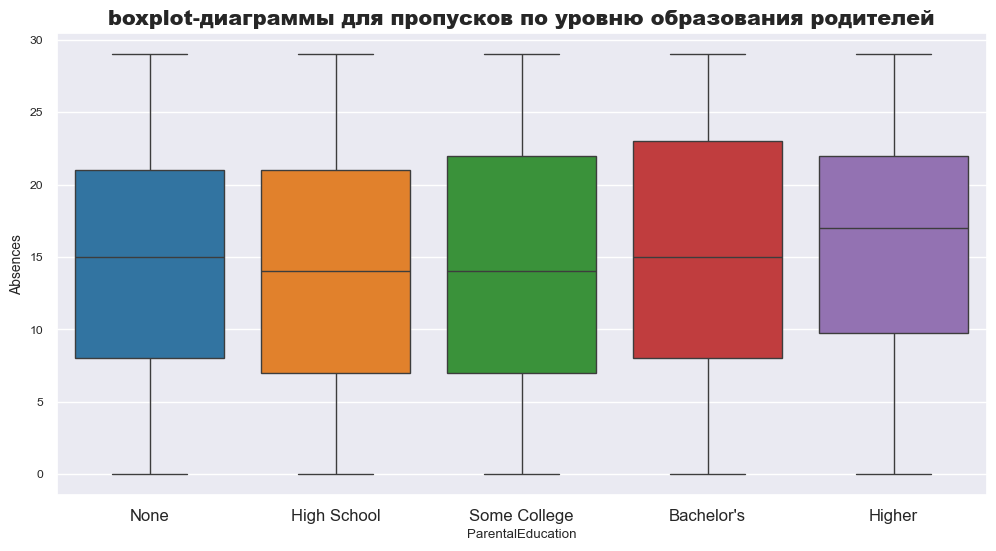

In [157]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=0.8)
sns.boxplot(df, x="ParentalEducation", y="Absences", palette="tab10")
plt.ylabel("Absences", size=10)
plt.xticks(ticks=range(5), labels=['None', 'High School', 'Some College', "Bachelor's", 'Higher'], size = 12)
plt.title("boxplot-диаграммы для пропусков по уровню образования родителей", size=15, weight='heavy')

C:\Users\aleks\AppData\Local\Temp\ipykernel_11952\3783336162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="ParentalSupport", y="Absences", palette="tab10")


Text(0.5, 1.0, 'boxplot-диаграммы для кол-ва пропусков по уровню помощи родителей')

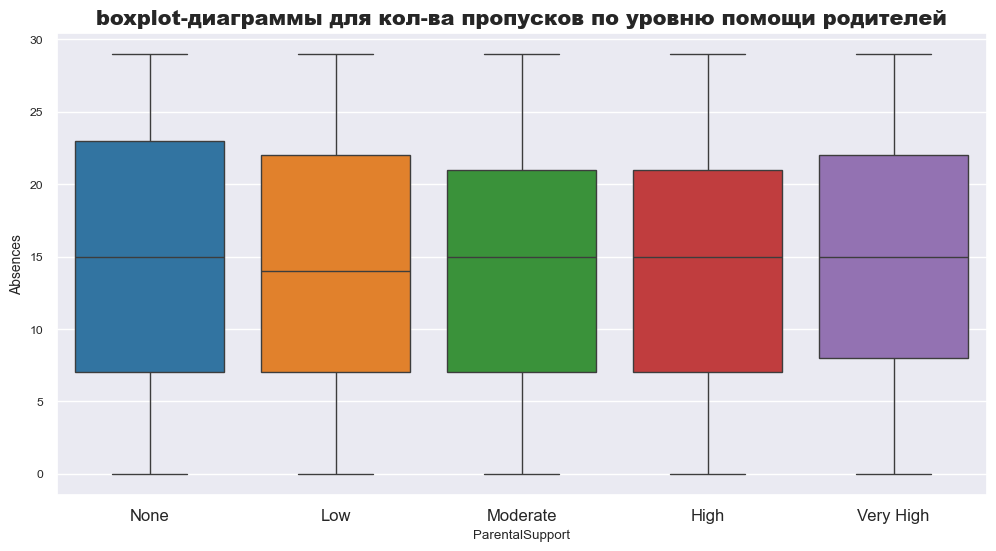

In [158]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=0.8)
sns.boxplot(df, x="ParentalSupport", y="Absences", palette="tab10")
plt.ylabel("Absences", size=10)
plt.xticks(ticks=range(5), labels=['None', 'Low', 'Moderate', "High", 'Very High'], size = 12)
plt.title("boxplot-диаграммы для кол-ва пропусков по уровню помощи родителей", size=15, weight='heavy')

#### Распределение непрерывных переменных

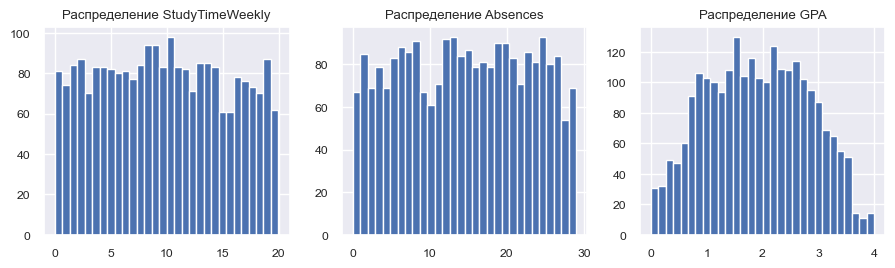

In [86]:
non_categorical = ['StudyTimeWeekly', 'Absences', 'GPA']

plt.figure(figsize = (15, 5))

for i, feature in enumerate(non_categorical, 1):
    plt.subplot(2, 5, i)
    plt.hist(df[feature], bins = 30)
    plt.title(f'Распределение {feature}')

plt.tight_layout()
plt.show()

Посмотрим, как распределена переменная StudyTimeWeekly в зависимости от класса оценки(то есть A,B,C,D,F)

Text(0.5, 1.0, 'Распределение посещаемости по типам оценок')

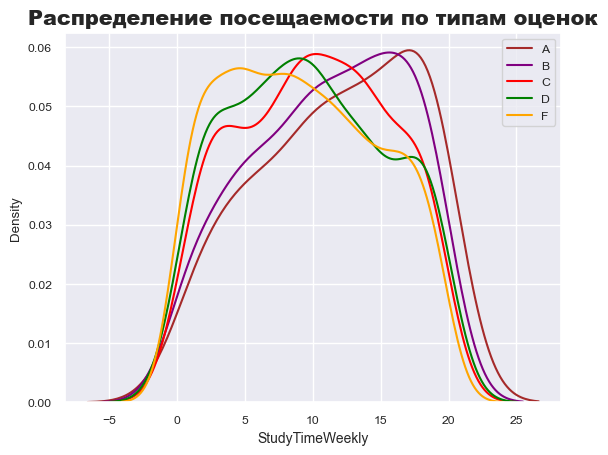

In [87]:
sns.kdeplot(df['StudyTimeWeekly'].loc[df["GradeClass"] == 0.0], c="brown", label='A')
sns.kdeplot(df['StudyTimeWeekly'].loc[df["GradeClass"] == 1.0], c="purple", label='B')
sns.kdeplot(df['StudyTimeWeekly'].loc[df["GradeClass"] == 2.0], c="red", label='C')
sns.kdeplot(df['StudyTimeWeekly'].loc[df["GradeClass"] == 3.0], c="green", label='D')
sns.kdeplot(df['StudyTimeWeekly'].loc[df["GradeClass"] == 4.0], c="orange", label='F')
plt.legend(loc="upper right")
plt.xlabel("StudyTimeWeekly", size=10)
plt.title("Распределение посещаемости по типам оценок", size=15, weight='heavy')

Видим, что чем выше оценка(A - лучшая оценка), тем больше распределение склоняется влево, а чем ниже оценка - тем больше вправо.

#### Анализ выбросов

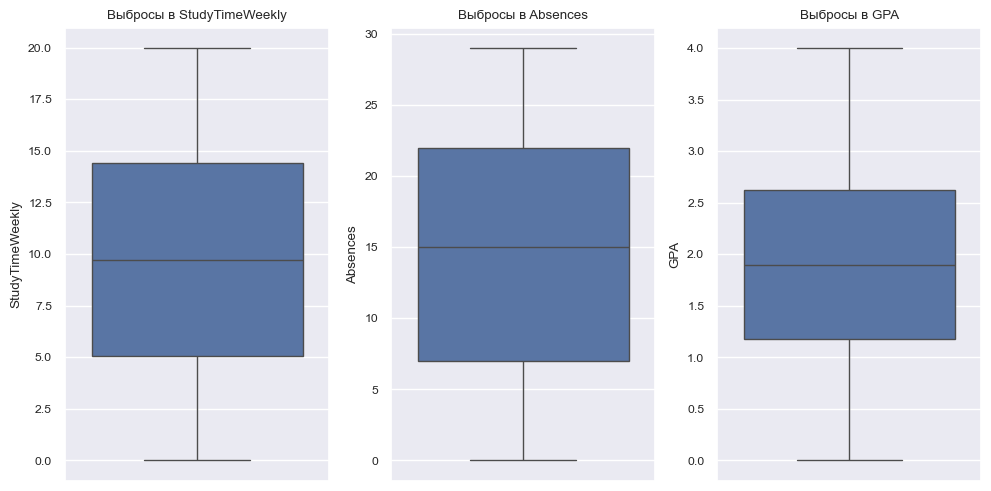

In [88]:
plt.figure(figsize=(10, 5))

for i, feature in enumerate(non_categorical, 1):
    plt.subplot(1, len(non_categorical), i)
    sns.boxplot(data = df, y = feature)
    plt.title(f'Выбросы в {feature}')

plt.tight_layout()
plt.show()

Как таковых выборосов не имеется

#### Матрица корреляций

<Axes: >

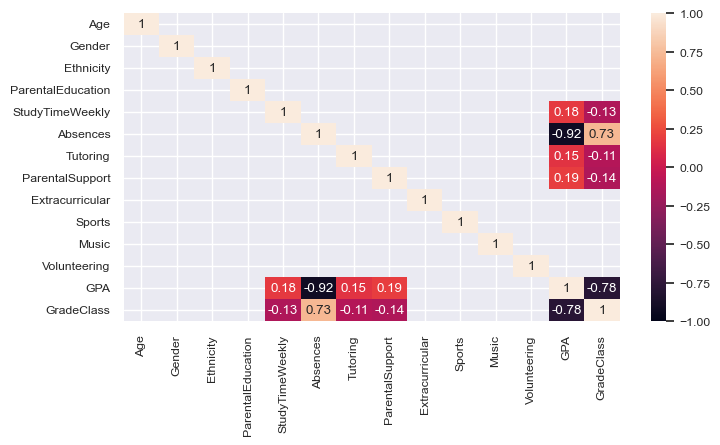

In [124]:
corr = df_std.corr()
param = 0.1
mask = (-param < corr) & (corr < param)

plt.figure(figsize = (8, 4))
sns.heatmap(corr, vmax=1, mask = mask, vmin=-1, annot=True)

#### Связь GPA и Absences

Text(0, 0.5, 'Absences')

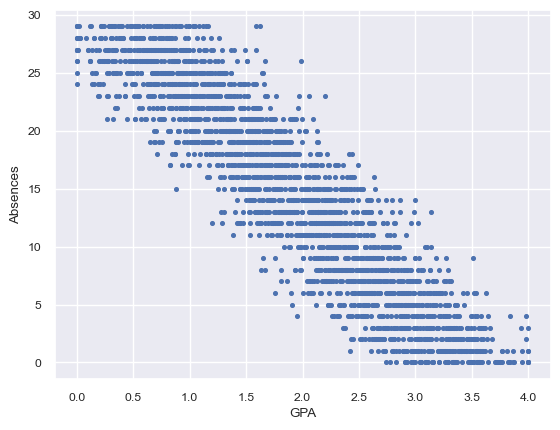

In [90]:
plt.scatter(df['GPA'], df['Absences'], s = 7)
plt.xlabel("GPA")
plt.ylabel("Absences")

Видим, что при росте числа пропусков(Absences), GPA уменьшается, а следовательно меняется и GradeClass. То есть посещаемость непосредственно влияет на успеваемость.

И напоследок уберем из датафрейма столбец GPA, потому что мы будем предсказывать GradeClass, а они напрямую связаны.

In [93]:
df.drop('GPA', axis = 1, inplace=True)